In [74]:
import duckdb 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [75]:
def read_node(tbl: str, node_name: str):
    con = duckdb.connect(database=file)
    df = con.sql(f"SELECT * FROM {tbl} WHERE node_id = {node_name}").df()
    con.close()
    return df  

file = "data/duckdb.database"
tbl = "Silver_SensorData"
node = "3200"
df = read_node(tbl, node)

df_lim = df
df_lim = df_lim[(df_lim['x'] >= 305)]
df_lim = df_lim[(df_lim['x'] <= 1250)]
df_lim = df_lim[(df_lim['y'] <= 560)]
df_lim


,node_id,timestamp,x,y
13624,3200,2019-03-15 17:56:35.686716,1243,263
13625,3200,2019-03-15 17:56:35.686721,1243,263
13626,3200,2019-03-15 17:56:36.686693,1171,258
13627,3200,2019-03-15 17:56:36.686697,1171,258
13628,3200,2019-03-15 17:56:37.687728,1094,307
...,...,...,...,...
1082367,3200,2020-01-20 20:24:41.470940,587,341
1082368,3200,2020-01-20 20:24:42.471130,565,363
1082369,3200,2020-01-20 20:24:43.471330,544,405
1082370,3200,2020-01-20 20:24:44.470883,532,453


In [76]:
img = plt.imread('kauppa.jpg')
img_height, img_width, _ = img.shape

## Ensin kokeilin piirtää pisteet karttaan, jotta voin pisteiden avulla luoda heatmapin

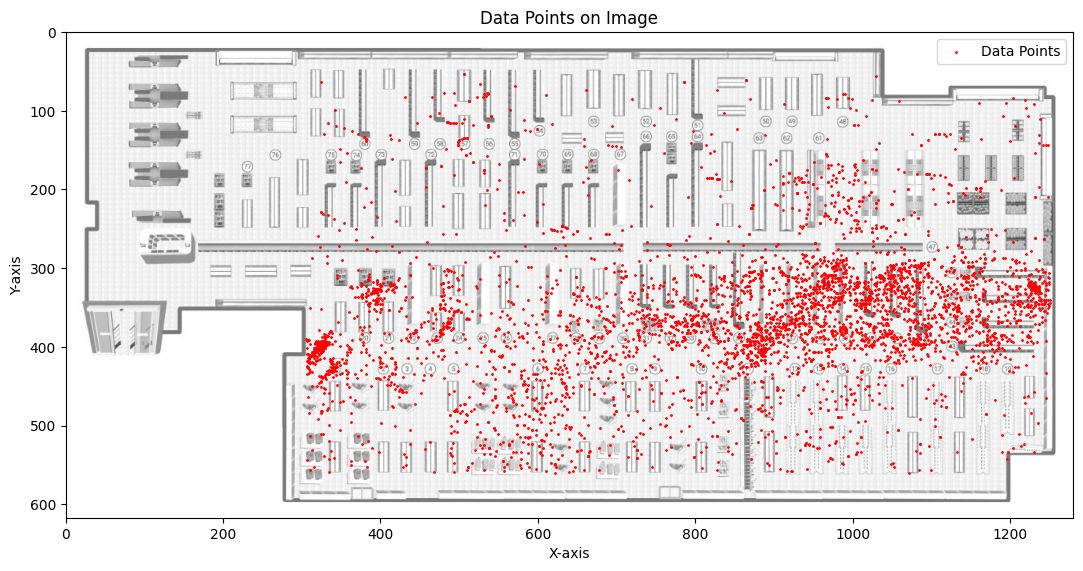

In [77]:
fig, ax = plt.subplots(figsize=(13, 13))

# Näytetään kuva
ax.imshow(img)

ax.scatter(df_lim["x"], df_lim["y"], color="red", label="Data Points", s=1)

# Akselien rajojen asettaminen
ax.set_xlim([0, img.shape[1]])
ax.set_ylim([img.shape[0], 0])

# Otsikon asettaminen
ax.set_title("Data Points on Image")

# Akselien nimien asettaminen
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# Legendan näyttäminen
ax.legend()
plt.show()

## Tätä muokataan vielä

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_47628/4002547840.py:7: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=df_lim, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_47628/4002547840.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=df_lim, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


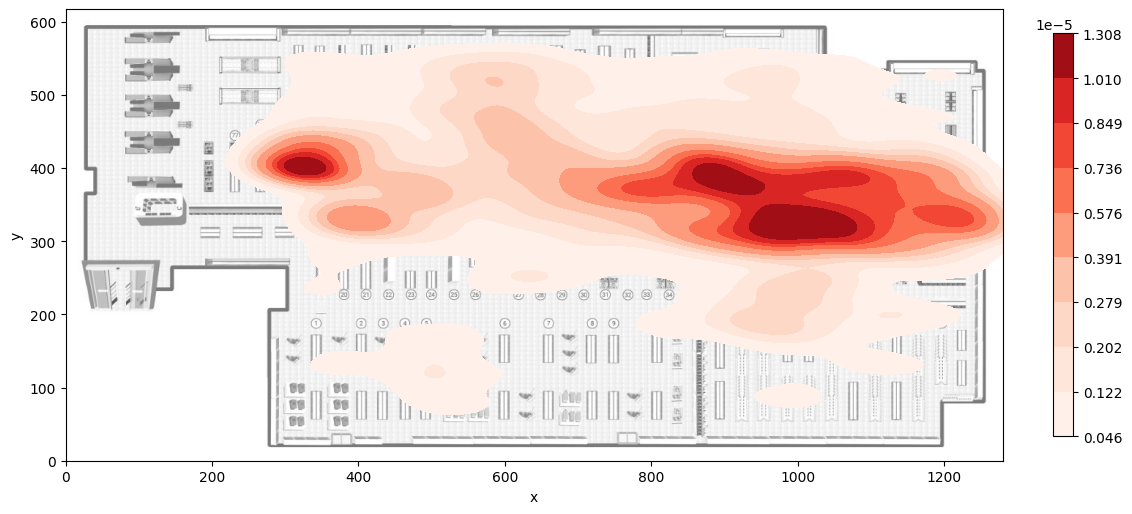

In [78]:
map = mpimg.imread('kauppa.jpg')

map_height, map_width, _ = map.shape

# Piirrä lämpökartta
plt.figure(figsize=(13, 13))
hmax = sns.kdeplot(data=df_lim, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta
plt.imshow(map, zorder=0, extent=[0, map_width, 0, map_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.show()